# K Nearest Neighbors Project 



In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
%matplotlib inline
sns.set_style('whitegrid')

plt.rcParams["patch.force_edgecolor"] = True

## Get the Data
** Read the 'KNN_Project_Data csv file into a dataframe **

In [3]:
df = pd.read_csv('KNN_Project_Data')

**Check the head of the dataframe.**

In [5]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


In [7]:
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

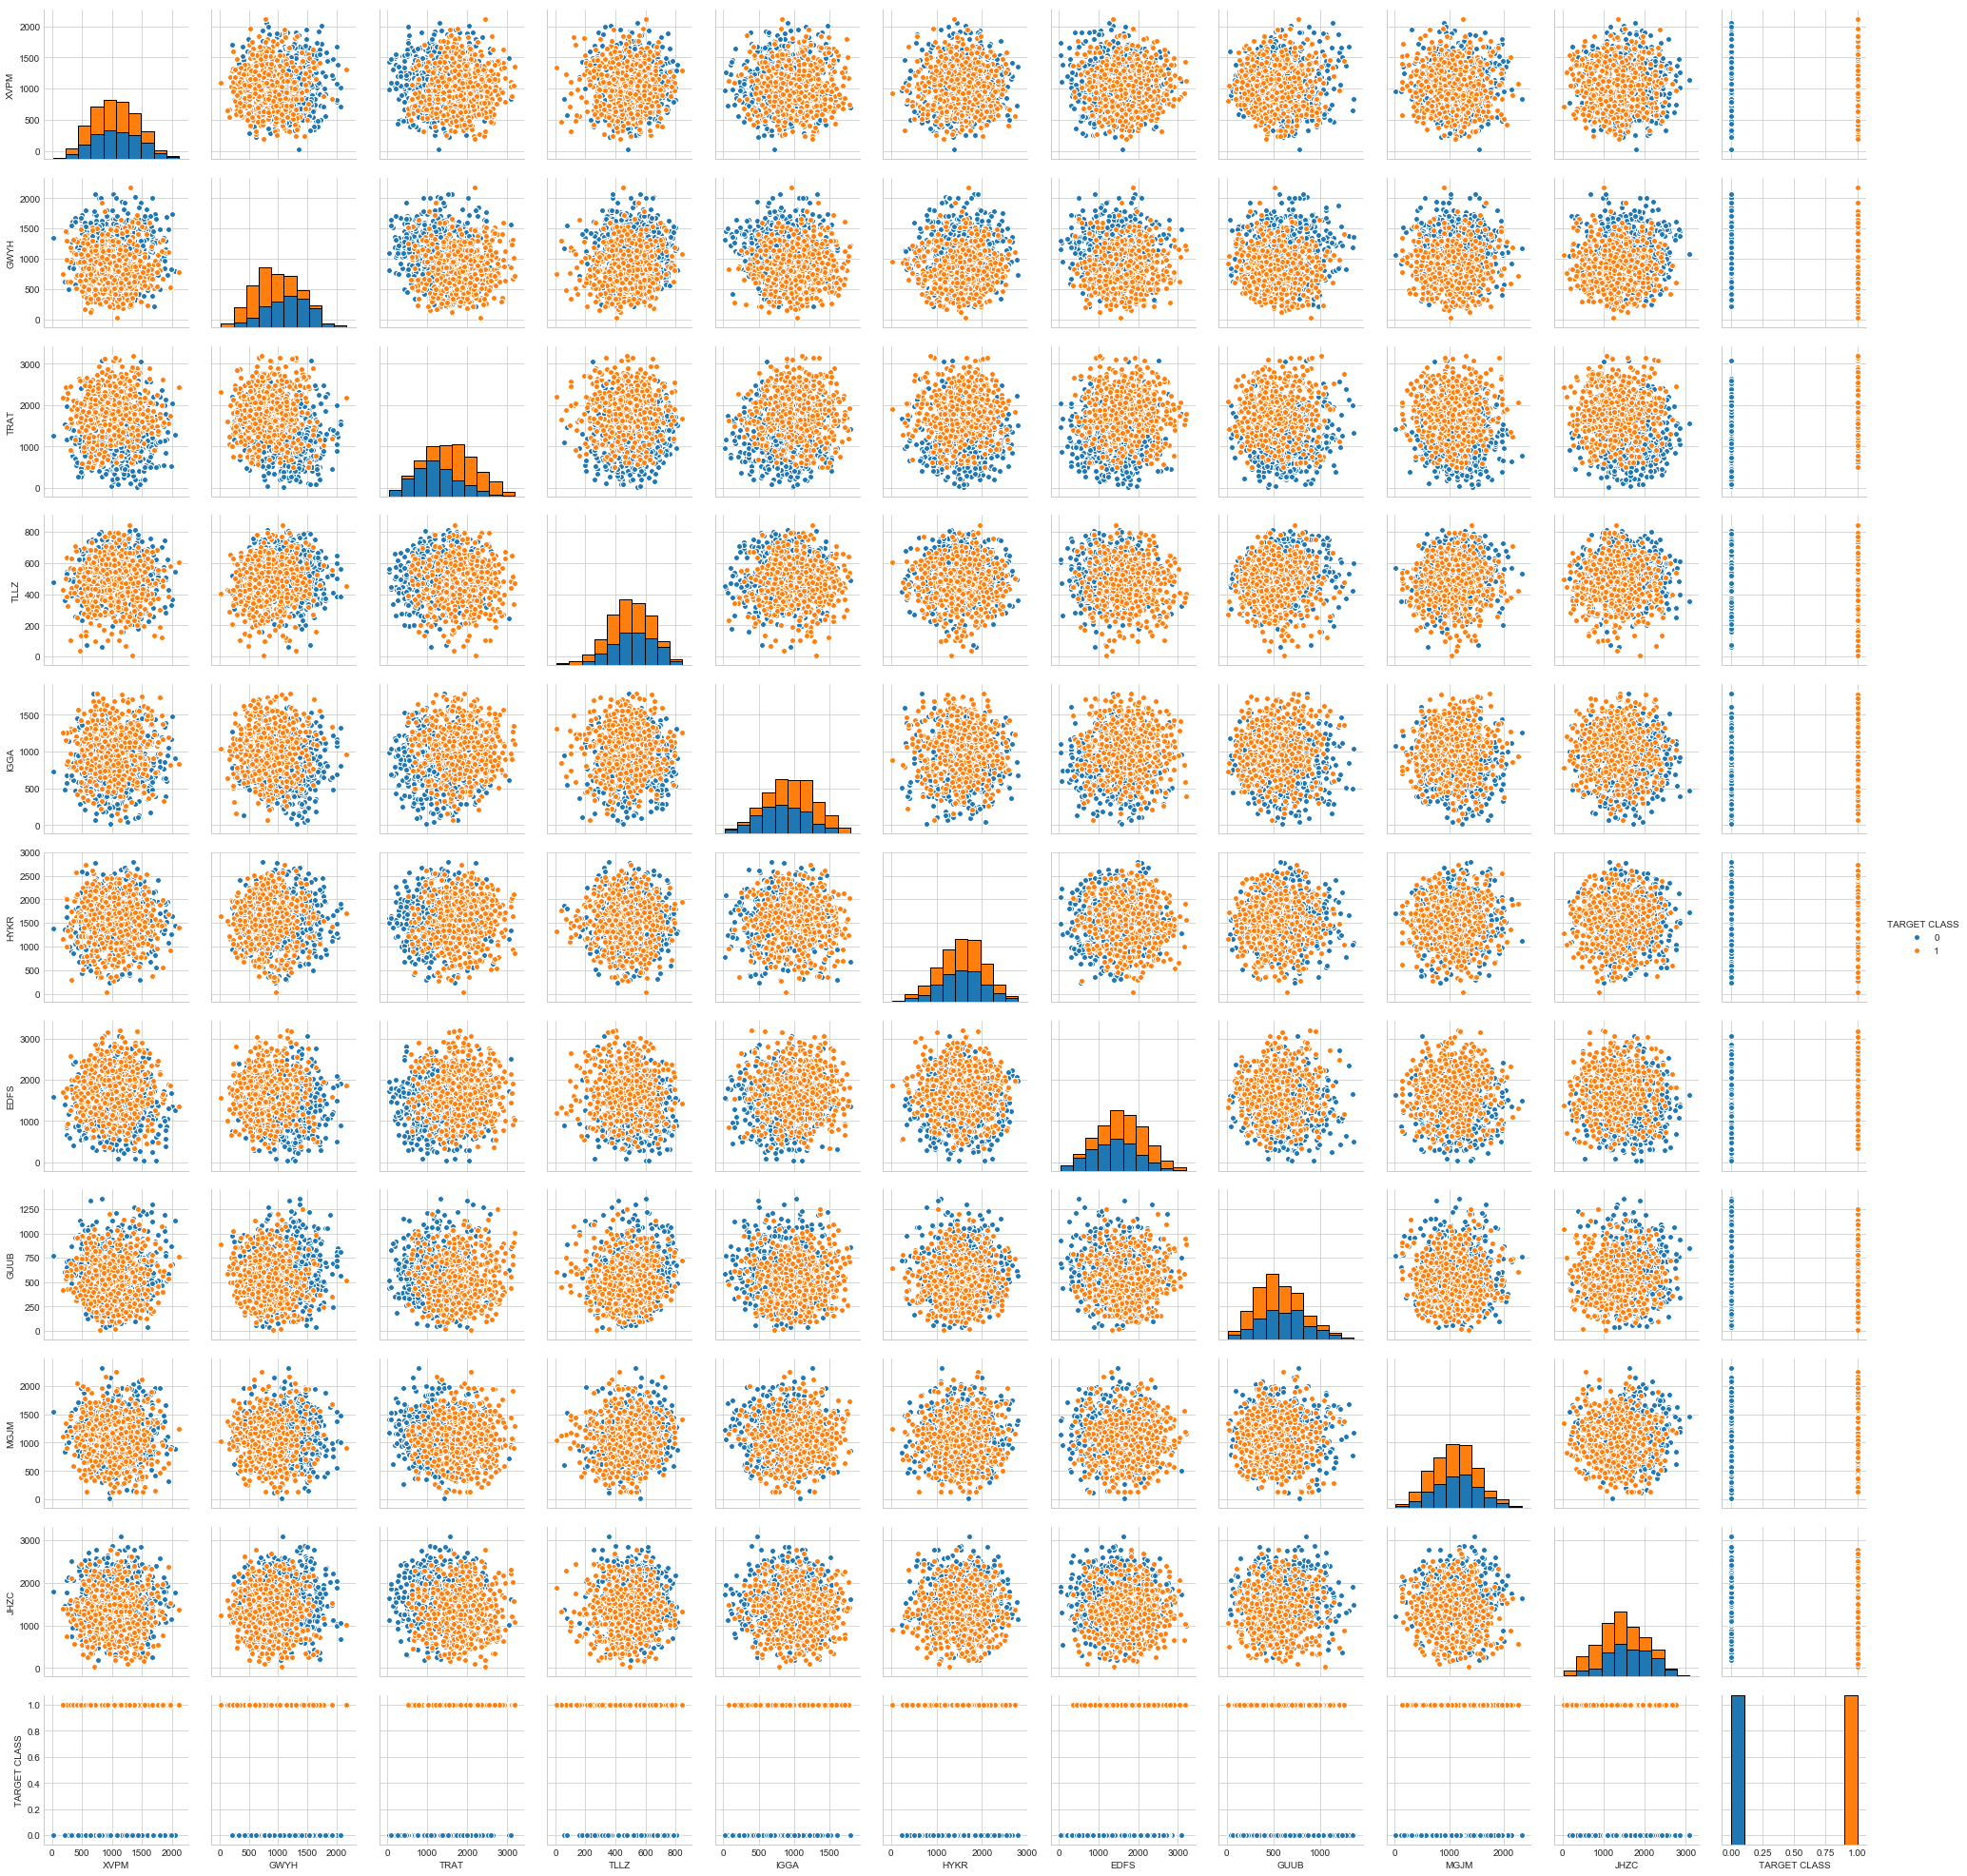

In [8]:
sns.pairplot(df, hue='TARGET CLASS')

# Standardize the Variables

Time to standardize the variables.

** Import StandardScaler from Scikit learn.**

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler= StandardScaler()

In [20]:
scaler.fit(df.iloc[:,0:10])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [21]:
scaled_feat = scaler.transform(df.iloc[:,0:10])

In [23]:
df_scaled= pd.DataFrame(scaled_feat, columns=df.columns[0:10])

In [24]:
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

**Use train_test_split to split your data into a training set and a testing set.**

In [25]:
from sklearn.model_selection import train_test_split


In [27]:
X_train, X_test, y_train, y_test = train_test_split( df_scaled,df['TARGET CLASS'], test_size=0.3, random_state=101)

# Using KNN

**Import KNeighborsClassifier from scikit learn.**

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn = KNeighborsClassifier(2)

In [30]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [31]:
y_pred = knn.predict(X_test)

# Predictions and Evaluations
Let's evaluate our KNN model!

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
print(classification_report(y_test,y_pred))
print('\n')
print(confusion_matrix(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.85      0.75       152
          1       0.79      0.57      0.66       148

avg / total       0.73      0.71      0.70       300



[[129  23]
 [ 64  84]]


# Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

** Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [34]:
err_rates = []

for i in range(1,30):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    y_pred_2 = knn.predict(X_test)
    
    err_rates.append(np.mean(y_pred_2 != y_test))

**Now create the following plot using the information from your for loop.**

Text(0.5,1,'Err Rates Vs. K')

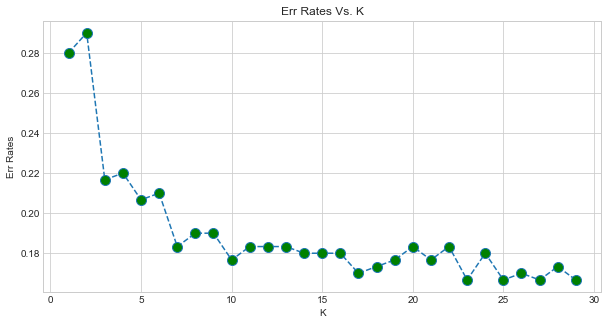

In [38]:
plt.figure(figsize=(10,5))
plt.plot(range(1,30), err_rates, marker='o', ls='--', markerfacecolor='green', markersize=10)
plt.xlabel('K')
plt.ylabel('Err Rates')
plt.title('Err Rates Vs. K')

***From Plot Above lets use K=10 since after that there is fluctuation, and also from k=10 to k=30, error rate differnce is arond 0.1***. 
Lets create another model with k=10

In [44]:
knn = KNeighborsClassifier(10)
knn.fit(X_train, y_train)
y_pred_2 = knn.predict(X_test)

print(classification_report(y_test,y_pred_2))
print('\n')
print(confusion_matrix(y_test, y_pred_2))

             precision    recall  f1-score   support

          0       0.81      0.86      0.83       152
          1       0.84      0.79      0.82       148

avg / total       0.82      0.82      0.82       300



[[130  22]
 [ 31 117]]
